In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [7]:
path1 = 'one.wav'
path2 = 'two.wav'


samplerate1, data1 = wavfile.read(path1)
print('Sampling Rate:', samplerate1)
print('Audio Shape:', np.shape(data1))

samplerate2, data2 = wavfile.read(path2)
print('Sampling Rate:', samplerate2)
print('Audio Shape:', np.shape(data2))

Sampling Rate: 48000
Audio Shape: (144384,)
Sampling Rate: 48000
Audio Shape: (140288,)


/var/folders/qc/xddyngm56mdcypsnpqnvckxm0000gn/T/ipykernel_1746/3770904846.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


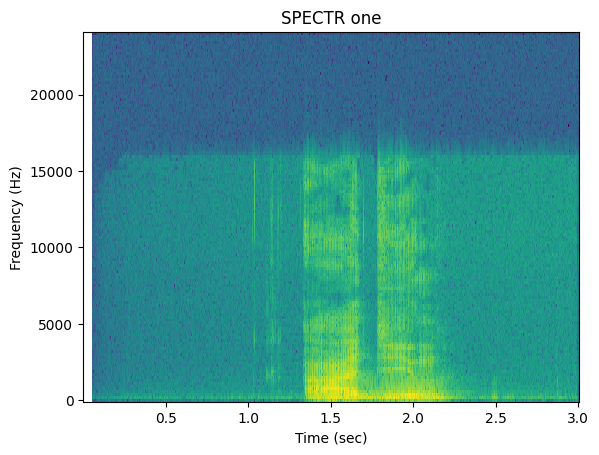

/var/folders/qc/xddyngm56mdcypsnpqnvckxm0000gn/T/ipykernel_1746/3770904846.py:16: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


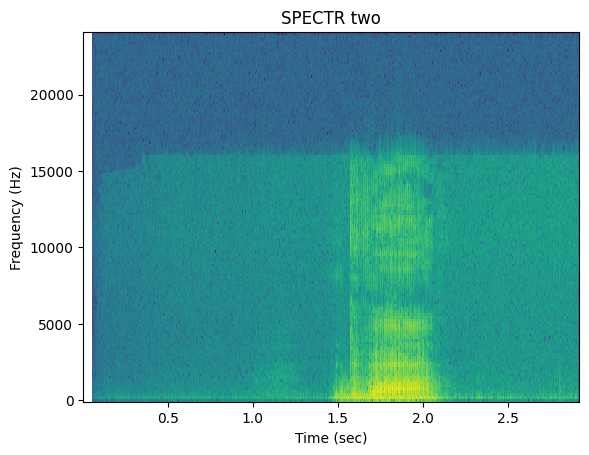

In [8]:
adata1 = data1[:]
s1 = samplerate1

fr, tm, spgram = signal.spectrogram(adata1, s1)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('SPECTR one')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

adata2 = data2[:]
s2 = samplerate2

fr, tm, spgram = signal.spectrogram(adata2, s2)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.title('SPECTR two')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [9]:
import librosa

samples1, sample_rate1 = librosa.load(path1)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

S1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_mels=128, fmax=20000)


samples2, sample_rate2 = librosa.load(path2)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

S2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_mels=128, fmax=20000)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


[Text(0.5, 1.0, 'MFCC two')]

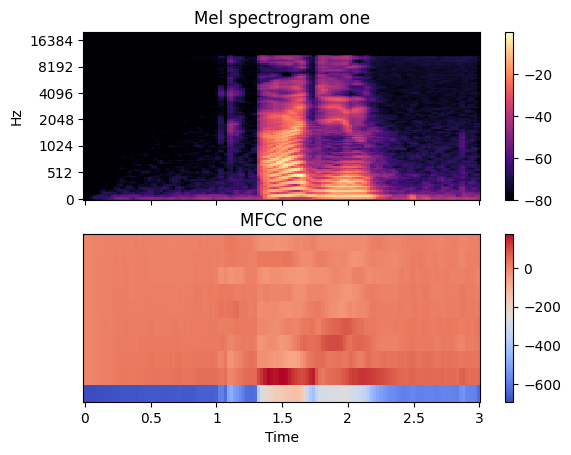

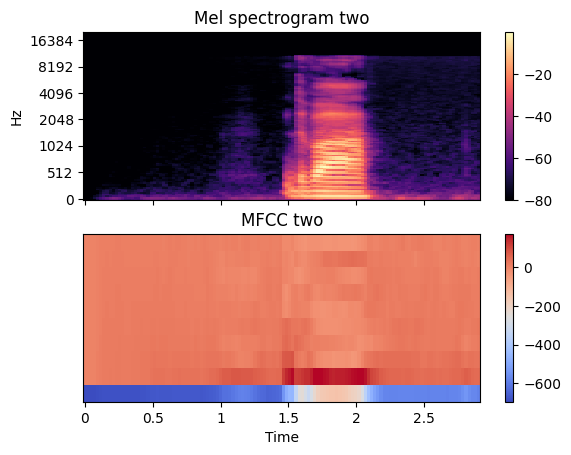

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S1, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram one')
ax[0].label_outer()
img = librosa.display.specshow(mfccs1, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC one')



fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S2, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram two')
ax[0].label_outer()
img = librosa.display.specshow(mfccs2, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC two')

In [11]:
import scipy
from spafe.features.gfcc import gfcc

gfccs1 = gfcc(y1, fs=sr1, num_ceps=15)

gfccs2 = gfcc(y2, fs=sr2, num_ceps=15)

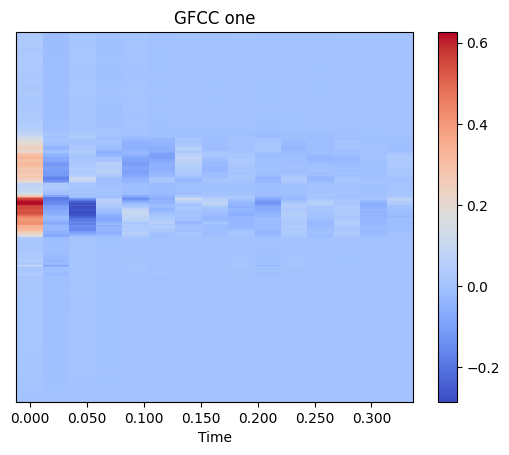

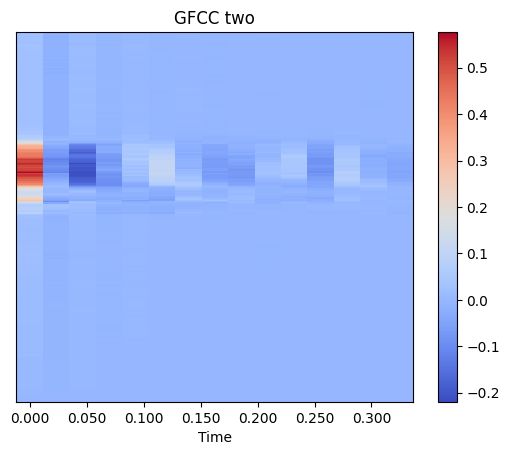

In [12]:
# Визуализация GFCC
librosa.display.specshow(gfccs1, x_axis='time', sr=sr1)
plt.colorbar()
plt.title('GFCC one')
plt.show()

# Визуализация GFCC
librosa.display.specshow(gfccs2, x_axis='time', sr=sr2)
plt.colorbar()
plt.title('GFCC two')
plt.show()

все графики сильно отличаются
в графиках первой дорожки всегда два пика
в графиках второй дорожки один пик
возможно это связано с гласными
звуки хорошо различимы по графикам